# Q10 This question involves the use of multiple linear regression on the Auto data set.

### (a) Produce a scatterplot matrix which includes all of the variables in the data set.

In [13]:
from ISLP import load_data
Auto = load_data('Auto')
Auto.columns
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


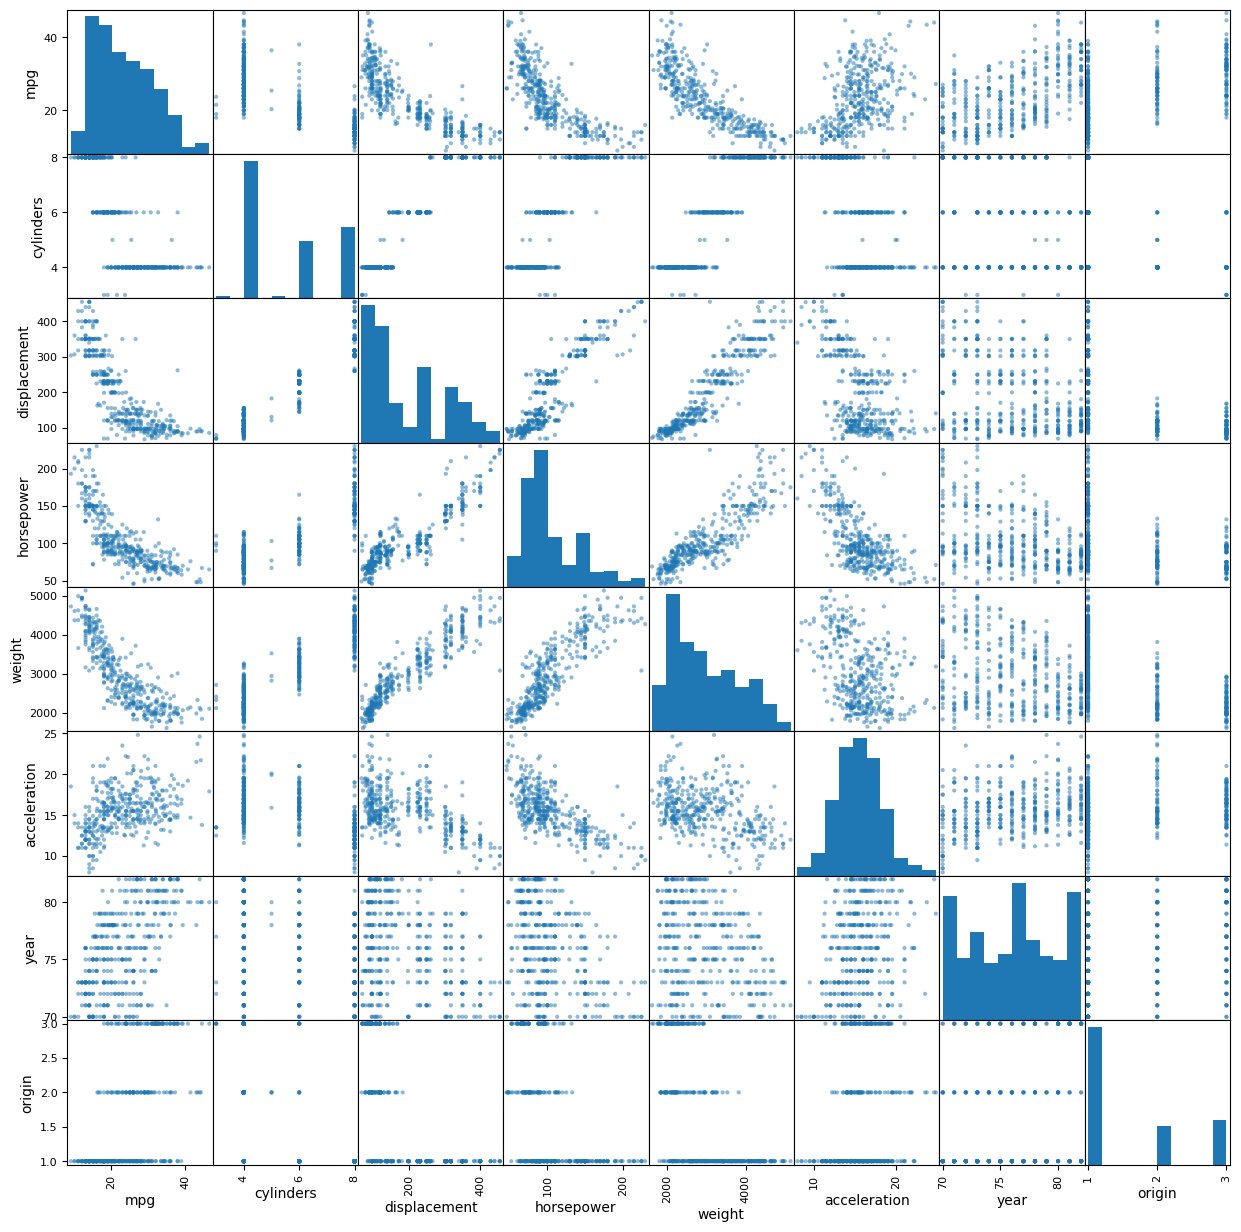

In [10]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

cols = Auto.columns.tolist()

scatter_matrix(Auto[cols], diagonal="hist")
plt.gcf().set_size_inches(15, 15)
plt.show()

### (b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [11]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output.

In [22]:
import statsmodels .api  as sm
from statsmodels .stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS ,
                         summarize ,
                         poly)

terms = Auto.columns

X = MS(terms). fit_transform(Auto)
y=Auto["mpg"]
model1 = sm.OLS(y, X)
results1 = model1.fit ()

summarize(results1)


,coef,std err,t,P>|t|
intercept,-3.979000e-13,1.100000e-12,-3.630000e-01,0.717
mpg,1.000000e+00,1.180000e-14,8.450000e+13,0.000
cylinders,3.331000e-15,7.520000e-14,4.400000e-02,0.965
displacement,-2.776000e-17,1.760000e-15,-1.600000e-02,0.987
horsepower,-9.437000e-16,3.200000e-15,-2.950000e-01,0.768
weight,-5.508000e-17,1.690000e-16,-3.250000e-01,0.745
acceleration,-9.714000e-17,2.290000e-14,-4.000000e-03,0.997
year,-8.882000e-16,1.480000e-14,-6.000000e-02,0.952
origin,5.829000e-16,6.670000e-14,9.000000e-03,0.993


#### (c)i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.

In [27]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 假設 Auto 是原始 DataFrame
formula = "mpg ~ " + " + ".join(Auto.columns.drop("mpg"))
model1 = ols(formula, data=Auto).fit()

anova_results = anova_lm(model1, typ=2)
anova_results["PR(>F)"] = anova_results["PR(>F)"].apply(lambda x: f"{x:.4f}")
print(anova_results)

                   sum_sq     df           F  PR(>F)
cylinders       25.791491    1.0    2.329125  0.1278
displacement    77.612668    1.0    7.008884  0.0084
horsepower      16.739754    1.0    1.511699  0.2196
weight        1091.631693    1.0   98.580813  0.0000
acceleration     7.358417    1.0    0.664509  0.4155
year          2402.249906    1.0  216.937408  0.0000
origin         291.134494    1.0   26.291171  0.0000
Residual      4252.212530  384.0         NaN     nan


#### (c)ii Which predictors appear to have a statistically significant relationship to the response?

#### (c)iii What does the coefficient for the year variable suggest?

### (d)Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

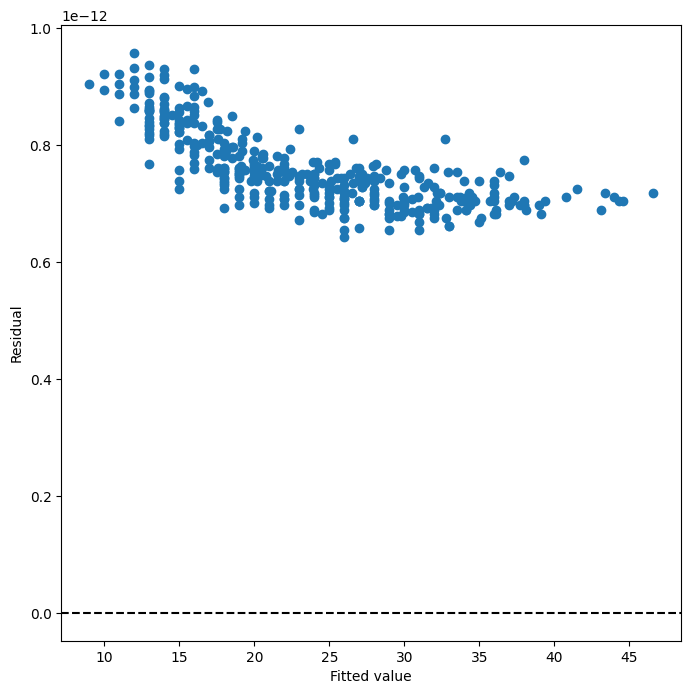

In [29]:
from matplotlib .pyplot import subplots
fig, ax = subplots(figsize=(8, 8))
ax.scatter(results1.fittedvalues, results1.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

### (e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [31]:
y = Auto["mpg"]

from ISLP.models import ModelSpec as MS
import statsmodels.api as sm
from ISLP.models import summarize

# 建立含交互作用的模型
X = MS([
    'horsepower',
    'weight',
    ('horsepower', 'weight'),  # interaction
    'year',
    ('year', 'origin')         # interaction
]).fit_transform(Auto)

model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)


,coef,std err,t,P>|t|
intercept,1.924300,3.897000,0.494,0.622
horsepower,-0.215300,0.021000,-10.482,0.000
weight,-0.011000,0.001000,-17.369,0.000
horsepower:weight,0.000055,0.000005,10.833,0.000
year,0.751200,0.045000,16.645,0.000
year:origin,0.009700,0.003000,3.243,0.001


In [33]:
import statsmodels.api as sm
from ISLP.models import ModelSpec as MS, summarize

y = Auto["mpg"]

# 定義三個模型 (不同交互項)
X1 = MS(['horsepower', 'weight', ('horsepower', 'weight')]).fit_transform(Auto)
X2 = MS(['year', 'origin', ('year', 'origin')]).fit_transform(Auto)
X3 = MS(['horsepower', 'weight', 'year', 'origin',
         ('horsepower', 'weight'), ('year', 'origin')]).fit_transform(Auto)

# 統一放入列表中
models = [X1, X2, X3]

# 逐一擬合與輸出
for i, X in enumerate(models, start=1):
    model = sm.OLS(y, X).fit()
    print(f"\n{'='*10} Model {i} {'='*10}")
    summarize(model)



========== Model 1 ==========

========== Model 2 ==========

========== Model 3 ==========


In [34]:
X = MS(['horsepower','weight', ('horsepower','weight')]).fit_transform(Auto)
print(type(X))
# 若是 DataFrame, 印欄位；若是 ndarray, 印 shape
if hasattr(X, "columns"):
    print("columns:", X.columns.tolist())
else:
    print("ndarray shape:", X.shape)


<class 'pandas.core.frame.DataFrame'>
columns: ['intercept', 'horsepower', 'weight', 'horsepower:weight']


### (f) Try a few different transformations of the variables, such as log(X), √X, X^2. Comment on your findings.

In [30]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')